### Registration

**Learning outcomes:**
- How to apply registration to an image using ants.

In [1]:
%matplotlib inline

import os
from helpers import *

import ants
# noinspection PyPep8Naming
import SimpleITK as sitk

print(f'AntsPy version = {ants.__version__}')
print(f'SimpleITK version = {sitk.__version__}')

AntsPy version = 0.5.4
SimpleITK version = 2.4.1


In [2]:
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
print(f'project folder = {BASE_DIR}')

project folder = /home/younes/PycharmProjects/MRI-preprocessing-techniques


In [3]:
raw_examples = [
    'fsl-open-dev_sub-001_T1w.nii.gz',
    'wash-120_sub-001_T1w.nii.gz',
    'kf-panda_sub-01_ses-3T_T1w.nii.gz',
    'listen-task_sub-UTS01_ses-1_T1w.nii.gz'
]

#### Raw image

interactive(children=(IntSlider(value=95, description='SLICE', max=191), Output()), _dom_classes=('widget-inte…

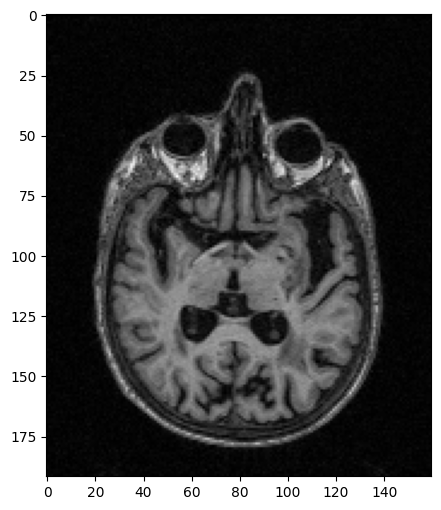

In [4]:
raw_example = raw_examples[0]
raw_img_path = os.path.join(BASE_DIR, 'assets', 'raw_examples', raw_example)
raw_img_ants = ants.image_read(raw_img_path, reorient='IAL')

explore_3D_array(arr=raw_img_ants.numpy())

#### Template image

interactive(children=(IntSlider(value=94, description='SLICE', max=188), Output()), _dom_classes=('widget-inte…

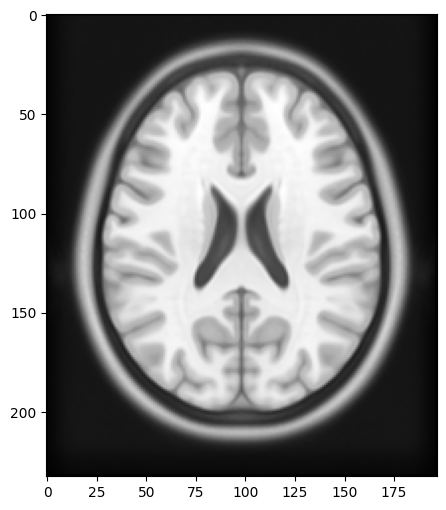

In [5]:
template_img_path = os.path.join(BASE_DIR, 'assets', 'templates', 'mni_icbm152_t1_tal_nlin_sym_09a.nii')
template_img_ants = ants.image_read(template_img_path, reorient='IAL')

explore_3D_array(arr = template_img_ants.numpy())

In [6]:
print('\t\tRAW IMG')
print(raw_img_ants)

print('\t\tTEMPLATE IMG')
print(template_img_ants)


		RAW IMG
ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (192, 192, 160)
	 Spacing    : (1.25, 1.25, 1.2)
	 Origin     : (98.1114, -149.1525, -129.5975)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]

		TEMPLATE IMG
ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (189, 233, 197)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (98.0, -98.0, -72.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]



#### Registration

In [7]:
transformation = ants.registration(
    fixed=template_img_ants,
    moving=raw_img_ants, 
    type_of_transform='SyN',
    verbose=True
)

antsRegistration -d 3 -r [0x7e6fdf89b3e8,0x7e6fdf89a1a8,1] -m mattes[0x7e6fdf89b3e8,0x7e6fdf89a1a8,1,32,regular,0.2] -t Affine[0.25] -c 2100x1200x1200x0 -s 3x2x1x0 -f 4x2x2x1 -x [NA,NA] -m mattes[0x7e6fdf89b3e8,0x7e6fdf89a1a8,1,32] -t SyN[0.200000,3.000000,0.000000] -c [40x20x0,1e-7,8] -s 2x1x0 -f 4x2x1 -u 1 -z 1 -o [/tmp/tmpthqnunex,0x7e6fdf89abc8,0x7e6fdf89afe8] -x [NA,NA] --float 1 --write-composite-transform 0 -v 1
All_Command_lines_OK
Using single precision for computations.
The composite transform comprises the following transforms (in order): 
  1. Center of mass alignment using fixed image: 0x7e6fdf89b3e8 and moving image: 0x7e6fdf89a1a8 (type = Euler3DTransform)
  Reading mask(s).
    Registration stage 0
      No fixed mask
      No moving mask
    Registration stage 1
      No fixed mask
      No moving mask
  number of levels = 4
  number of levels = 3
  fixed image: 0x7e6fdf89b3e8
  moving image: 0x7e6fdf89a1a8
  fixed image: 0x7e6fdf89b3e8
  moving image: 0x7e6fdf89a1a8
D

In [8]:
print(transformation)

{'warpedmovout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (189, 233, 197)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (98.0, -98.0, -72.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]
, 'warpedfixout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (192, 192, 160)
	 Spacing    : (1.25, 1.25, 1.2)
	 Origin     : (98.1114, -149.1525, -129.5975)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]
, 'fwdtransforms': ['/tmp/tmpthqnunex1Warp.nii.gz', '/tmp/tmpthqnunex0GenericAffine.mat'], 'invtransforms': ['/tmp/tmpthqnunex0GenericAffine.mat', '/tmp/tmpthqnunex1InverseWarp.nii.gz']}


interactive(children=(IntSlider(value=94, description='SLICE', max=188), Output()), _dom_classes=('widget-inte…

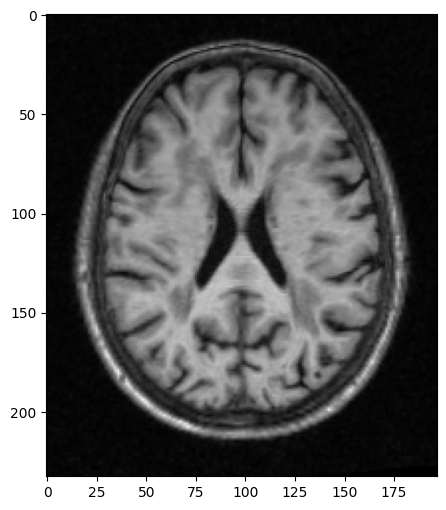

In [9]:
registered_img_ants = transformation['warpedmovout']

explore_3D_array(arr=registered_img_ants.numpy())

In [10]:
out_folder =  os.path.join(BASE_DIR, 'assets', 'preprocessed')
out_folder = os.path.join(out_folder, raw_example.split('.')[0]) # create folder with name of the raw file
os.makedirs(out_folder, exist_ok=True) # create folder if not exists

out_filename = add_suffix_to_filename(raw_example, suffix='registered')
out_path = os.path.join(out_folder, out_filename)

print(raw_img_path[len(BASE_DIR):])
print(out_path[len(BASE_DIR):])

/assets/raw_examples/fsl-open-dev_sub-001_T1w.nii.gz
/assets/preprocessed/fsl-open-dev_sub-001_T1w/fsl-open-dev_sub-001_T1w_registered.nii.gz


In [11]:
registered_img_ants.to_file(out_path)